In [1]:
cd C:\Users\gudn1\Downloads\CSV and IPYNB

C:\Users\gudn1\Downloads\CSV and IPYNB


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime, date

In [3]:
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

In [4]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df.shape

(110527, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
# datetime64 is a pandas datatype and ns stands for nano second
df["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"]).dt.date.astype("datetime64[ns]")
df["AppointmentDay"] = pd.to_datetime(df["AppointmentDay"]).dt.date.astype("datetime64[ns]")

In [8]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [10]:
df["sch_weekday"] = df["ScheduledDay"].dt.dayofweek
df["app_weekday"] = df["AppointmentDay"].dt.dayofweek

In [11]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,sch_weekday,app_weekday
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,4
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4,4
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,4,4
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4,4
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4,4


In [12]:
df["sch_weekday"].value_counts()

sch_weekday
1    26168
2    24262
0    23085
4    18915
3    18073
5       24
Name: count, dtype: int64

In [13]:
df["sch_weekday"].unique()

array([4, 2, 1, 3, 0, 5])

In [14]:
df["sch_weekday"].nunique()

6

In [15]:
df["app_weekday"].value_counts()

app_weekday
2    25867
1    25640
0    22715
4    19019
3    17247
5       39
Name: count, dtype: int64

In [16]:
df["app_weekday"].unique()

array([4, 1, 0, 2, 3, 5])

In [17]:
df["app_weekday"].nunique()

6

Dayofweek is a pandas's datatype to find the day of a week.
From above result, we can see that most of the schedules appointments are on weekdays than weekends

Visualizing the results

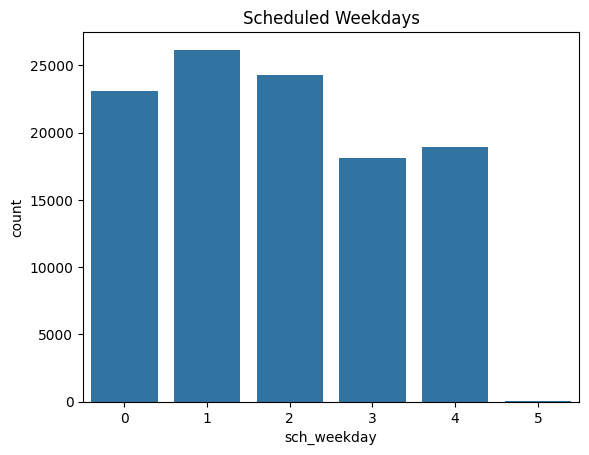

In [18]:
plt.title("Scheduled Weekdays")
sch_week_plot = sns.countplot(x= df["sch_weekday"], data=df)

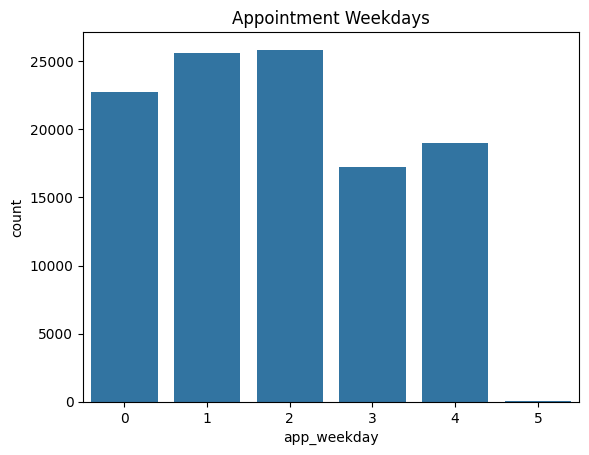

In [19]:
plt.title("Appointment Weekdays")
app_week_plot = sns.countplot(x="app_weekday", data=df)

In [20]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'sch_weekday', 'app_weekday'],
      dtype='object')

In [21]:
df = df.rename(columns={"Hipertension":"Hypertension", 
                       "Handcap":"Handicap", 
                       "SMS_received":"SMSreceived", 
                       "No-show":"Noshow"})

In [22]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMSreceived', 'Noshow',
       'sch_weekday', 'app_weekday'],
      dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hypertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handicap        110527 non-null  int64         
 12  SMSreceived     110527 non-null  int64         
 13  Noshow          110527 non-null  object        
 14  sch_weekday     110527 non-null  int

In [24]:
df = df.drop(["PatientId", "AppointmentID", "Neighbourhood"], axis=1)

In [25]:
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Scholarship',
       'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMSreceived',
       'Noshow', 'sch_weekday', 'app_weekday'],
      dtype='object')

In [26]:
df.describe()

,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,sch_weekday,app_weekday
count,110527,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,2016-05-08 20:33:18.179630080,2016-05-19 00:57:50.008233472,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,1.851955,1.858243
min,2015-11-10 00:00:00,2016-04-29 00:00:00,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016-04-29 00:00:00,2016-05-09 00:00:00,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,2016-05-10 00:00:00,2016-05-18 00:00:00,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,2016-05-20 00:00:00,2016-05-31 00:00:00,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000
max,2016-06-08 00:00:00,2016-06-08 00:00:00,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,5.000000
std,NaN,NaN,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,1.378520,1.371672


In [27]:
df["Noshow"].value_counts()

Noshow
No     88208
Yes    22319
Name: count, dtype: int64

Text(0.5, 1.02, 'Count of Target variable per category')

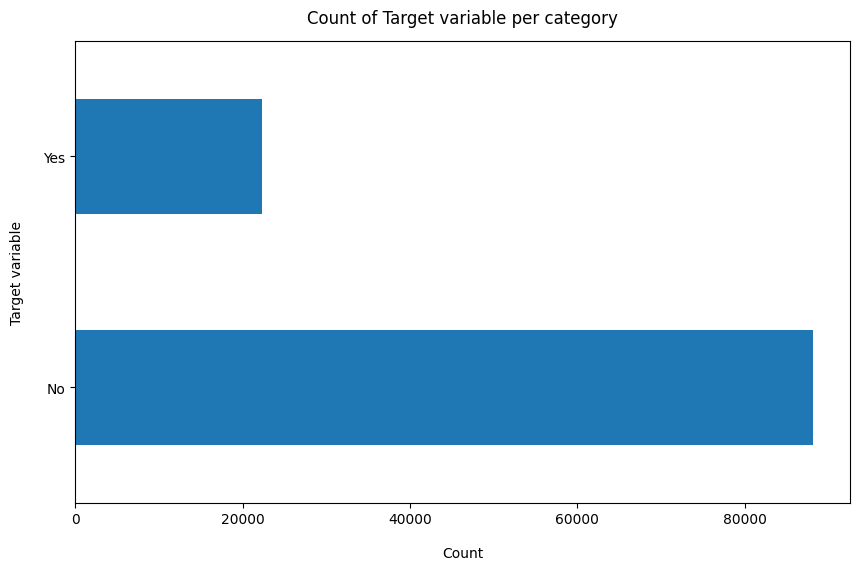

In [28]:
df["Noshow"].value_counts().plot(kind="barh", figsize=(10, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target variable", labelpad=14)
plt.title("Count of Target variable per category", y=1.02)

Calculating the percentage of Appointment or not

In [31]:
100*df["Noshow"].value_counts()/len(df["Noshow"])

Noshow
No     79.806744
Yes    20.193256
Name: count, dtype: float64

Approximately 80% of appointment says no

Checking for missing values

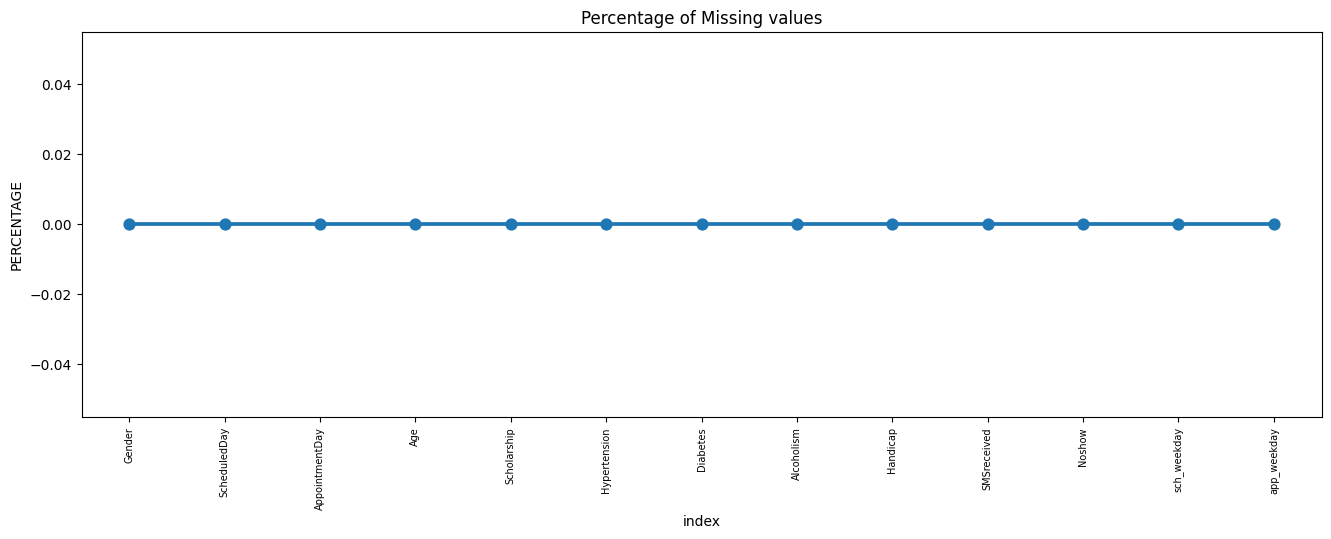

In [33]:
missing_values = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x="index", y=0, data=missing_values)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()                                

In [35]:
df.isnull().sum()

Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMSreceived       0
Noshow            0
sch_weekday       0
app_weekday       0
dtype: int64

In [36]:
df["Age"].max()

115

In [37]:
labels = ["{0} - {1}".format(i, i+20) for i in range(1, 118, 20)]
df["Age_group"] = pd.cut(df.Age, range(1, 130, 20), right=False, labels=labels)
df.drop(["Age"], axis=1, inplace=True)

---------- Gender ----------
Gender
F    71840
M    38687
Name: count, dtype: int64
---------- ScheduledDay ----------
ScheduledDay
2016-05-03    4238
2016-05-02    4216
2016-05-16    4120
2016-05-05    4095
2016-05-10    4024
              ... 
2016-04-16       1
2016-01-28       1
2015-11-10       1
2016-03-19       1
2016-03-05       1
Name: count, Length: 111, dtype: int64
---------- AppointmentDay ----------
AppointmentDay
2016-06-06    4692
2016-05-16    4613
2016-05-09    4520
2016-05-30    4514
2016-06-08    4479
2016-05-11    4474
2016-06-01    4464
2016-06-07    4416
2016-05-12    4394
2016-05-02    4376
2016-05-18    4373
2016-05-17    4372
2016-06-02    4310
2016-05-10    4308
2016-05-31    4279
2016-05-05    4273
2016-05-19    4270
2016-05-03    4256
2016-05-04    4168
2016-06-03    4090
2016-05-24    4009
2016-05-13    3987
2016-05-25    3909
2016-05-06    3879
2016-05-20    3828
2016-04-29    3235
2016-05-14      39
Name: count, dtype: int64
---------- Scholarship ------

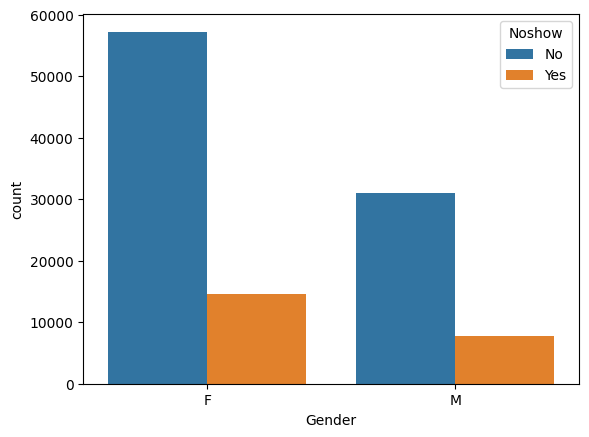

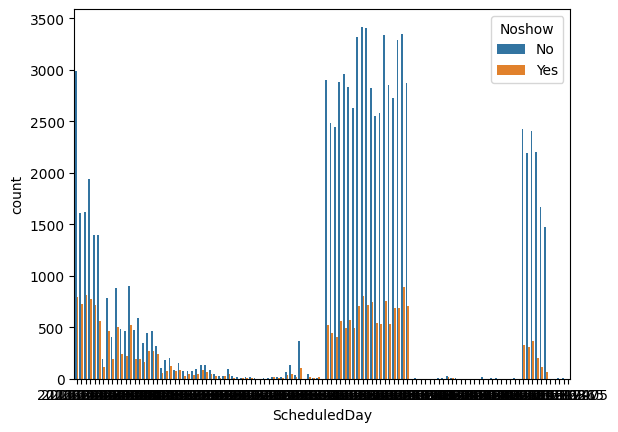

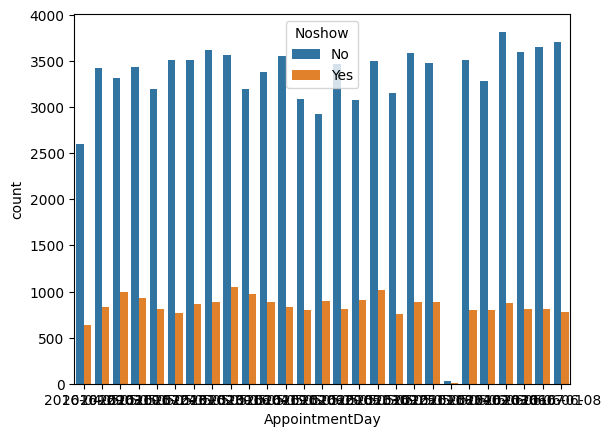

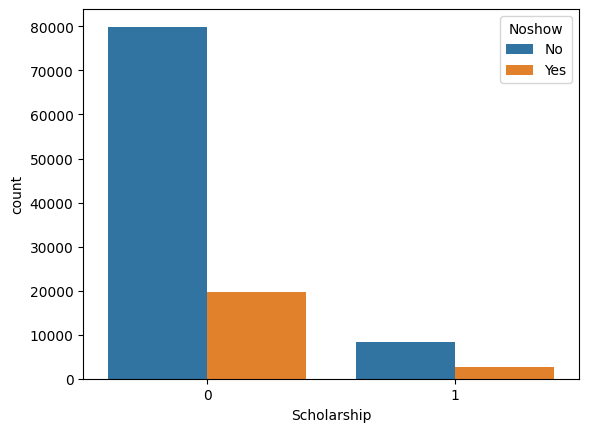

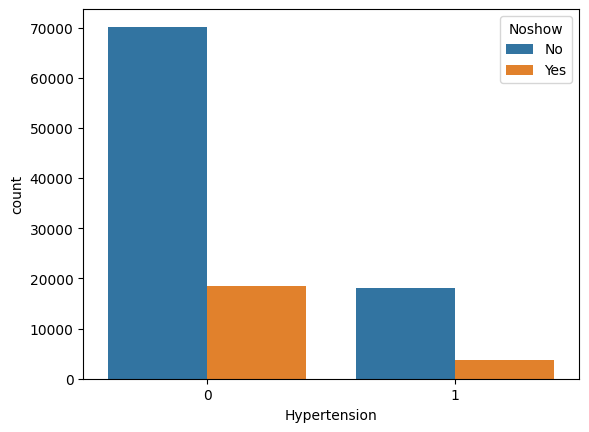

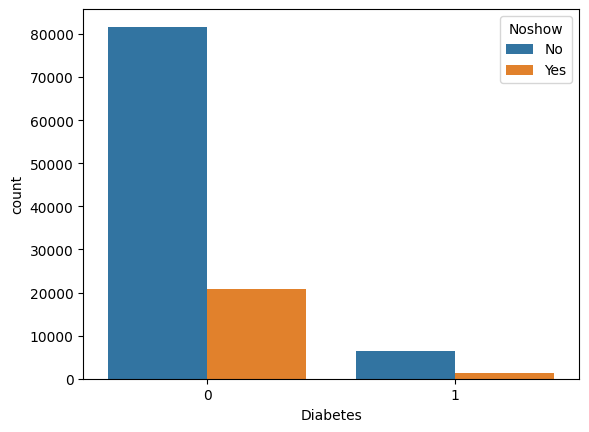

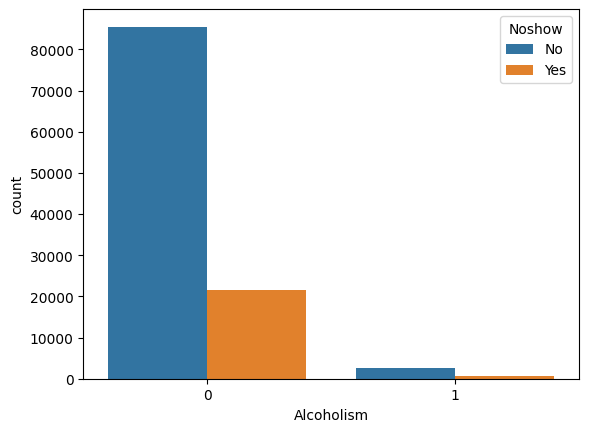

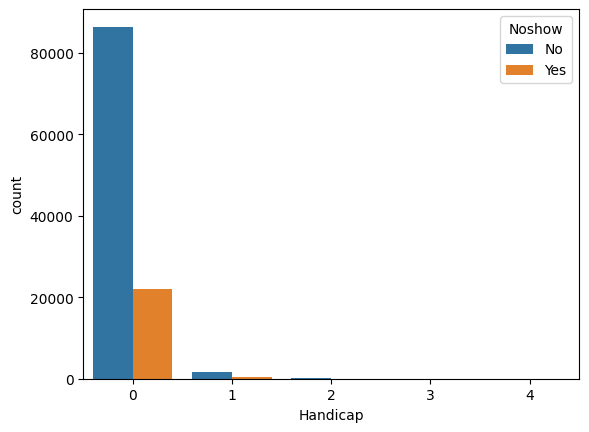

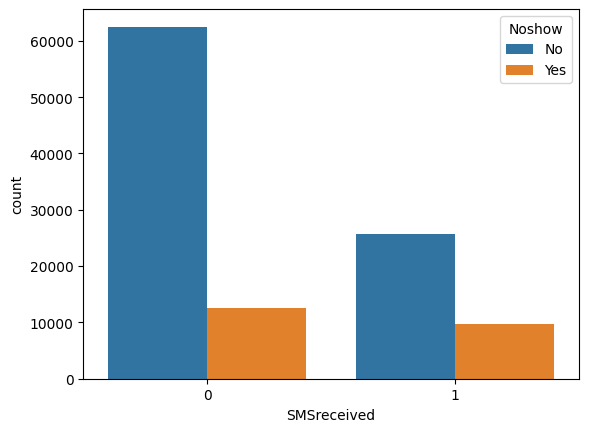

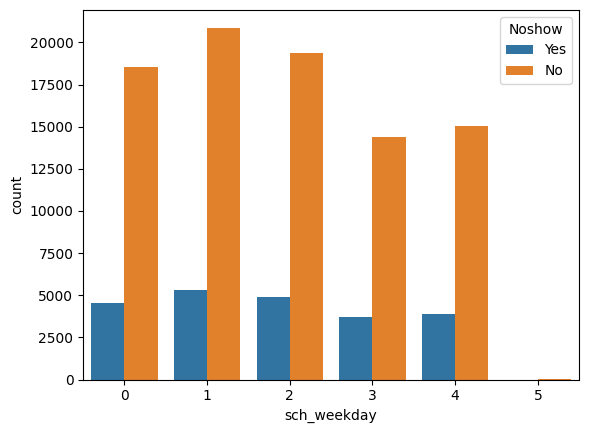

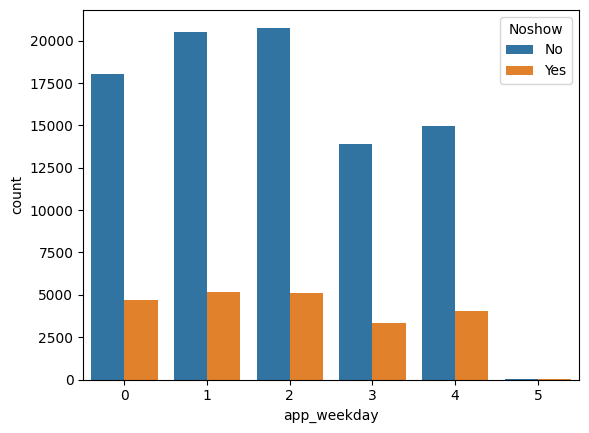

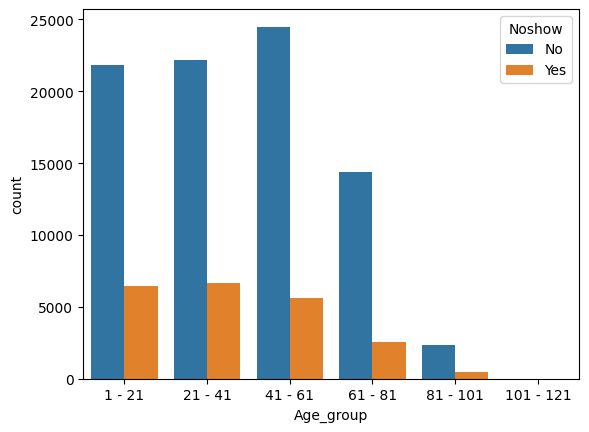

In [38]:
for i, predictor in enumerate(df.drop(columns=["Noshow"])):
    print("-"*10, predictor, "-"*10)
    print(df[predictor].value_counts())
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue="Noshow")

In [39]:
df["Noshow"] = np.where(df.Noshow == "Yes", 1, 0)

In [40]:
df["Noshow"].value_counts()

Noshow
0    88208
1    22319
Name: count, dtype: int64

In [41]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,ScheduledDay,AppointmentDay,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,Noshow,sch_weekday,app_weekday,Gender_F,Gender_M,Age_group_1 - 21,Age_group_21 - 41,Age_group_41 - 61,Age_group_61 - 81,Age_group_81 - 101,Age_group_101 - 121
0,2016-04-29,2016-04-29,0,1,0,0,0,0,0,4,4,True,False,False,False,False,True,False,False
1,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,False,True,False,False,True,False,False,False
2,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,True,False,False,False,False,True,False,False
3,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,True,False,True,False,False,False,False,False
4,2016-04-29,2016-04-29,0,1,1,0,0,0,0,4,4,True,False,False,False,True,False,False,False


<Axes: >

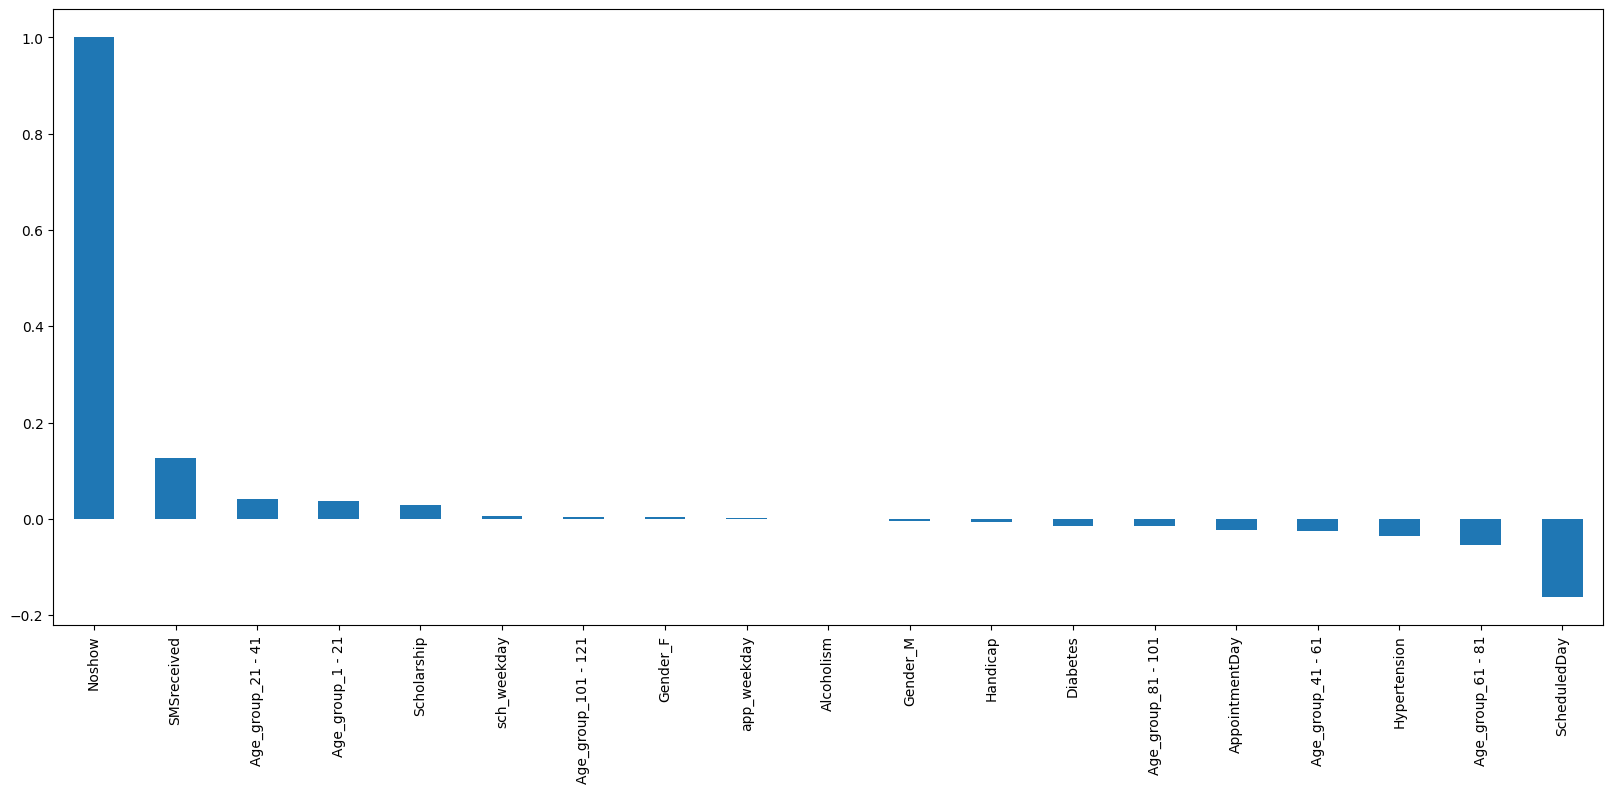

In [42]:
plt.figure(figsize=(20, 8))
df_dummies.corr()["Noshow"].sort_values(ascending = False).plot(kind="bar")

<Axes: >

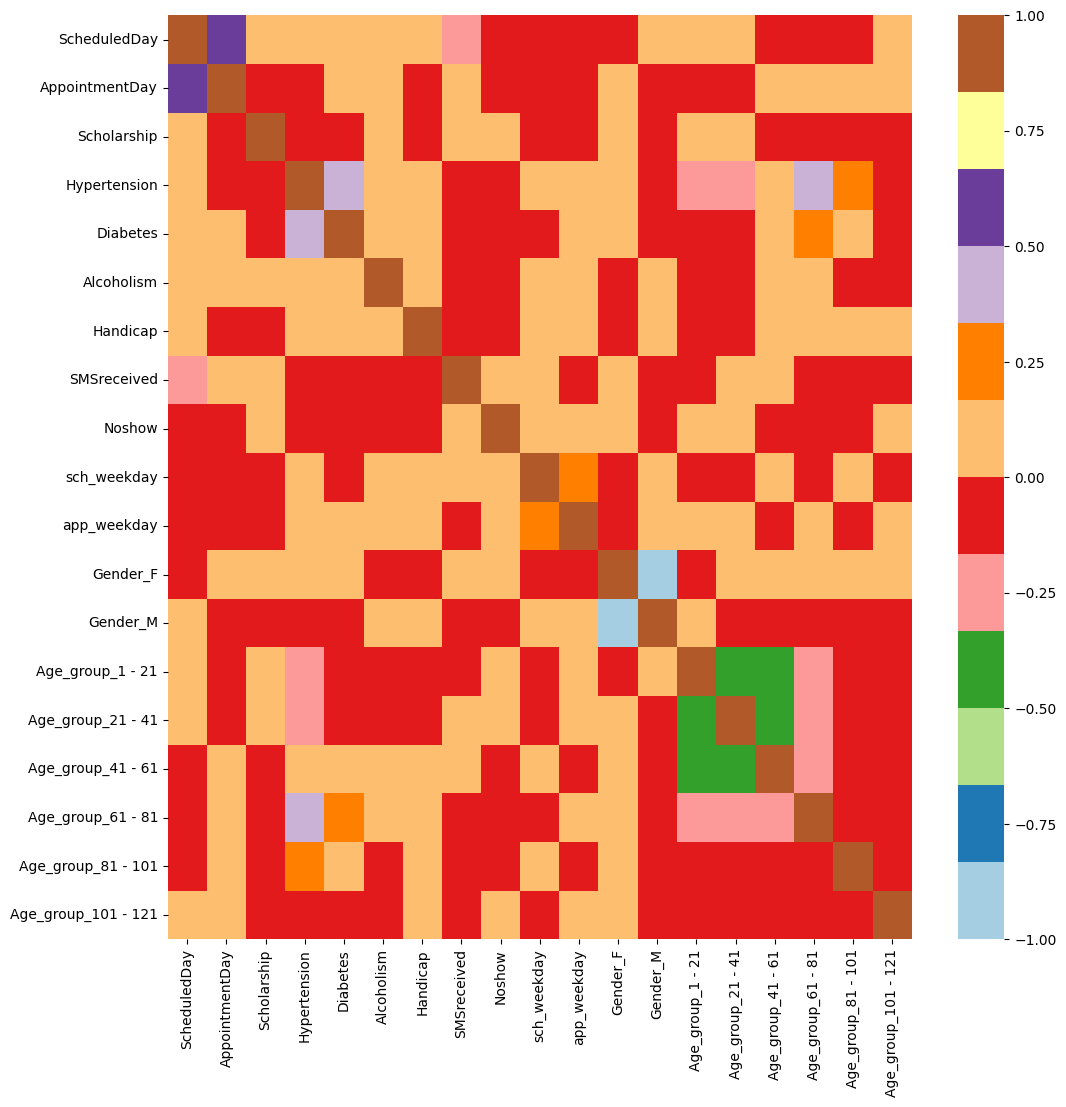

In [43]:
plt.figure(figsize=(12, 12))
sns.heatmap(df_dummies.corr(), cmap="Paired")

Biveriate Analysis

In [44]:
df1 = df.loc[df["Noshow"]==0]
df2 = df.loc[df["Noshow"]==1]

In [49]:
def uniplot(df, col, title, hue=None):
    sns.set_style("whitegrid")
    sns.set_context("talk")
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams["axes.titlesize"] = 22
    plt.rcParams["axes.titlepad"] = 30



    temp = pd.Series(data=hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width, 8)
    plt.xticks(rotation=45)
    plt.title(title)
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=hue, palette="bright")

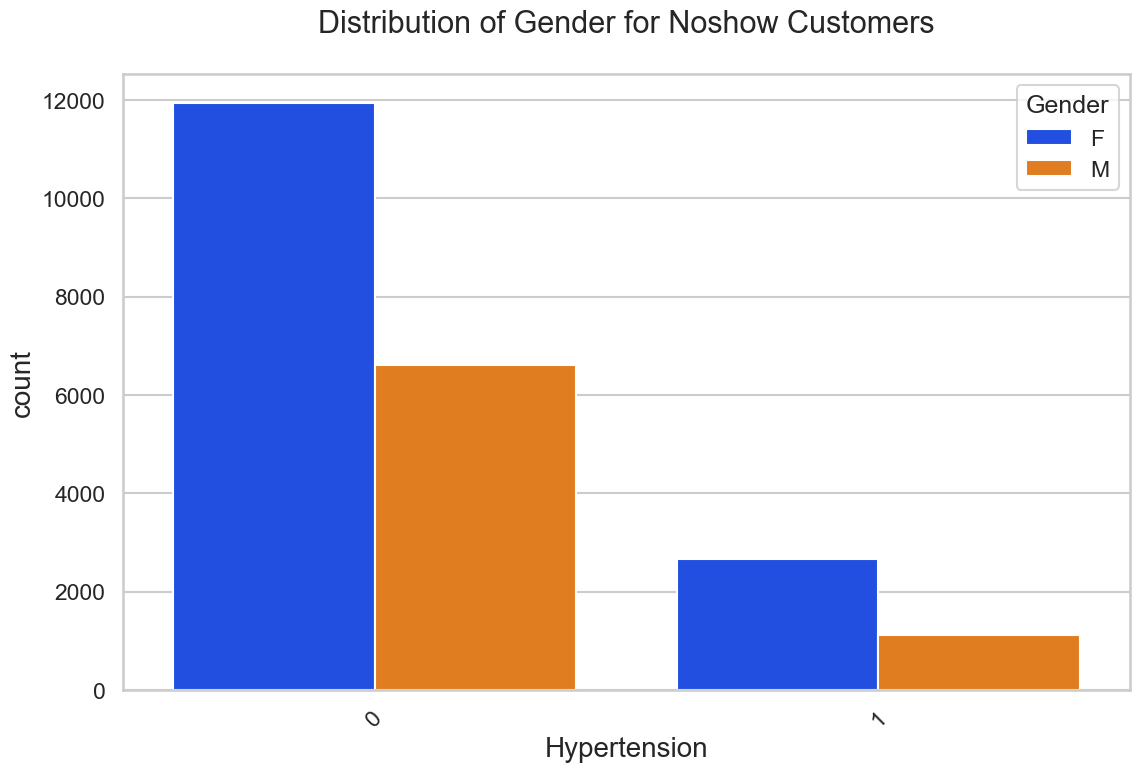

In [51]:
uniplot(df2, col="Hypertension", title="Distribution of Gender for Noshow Customers", hue="Gender")

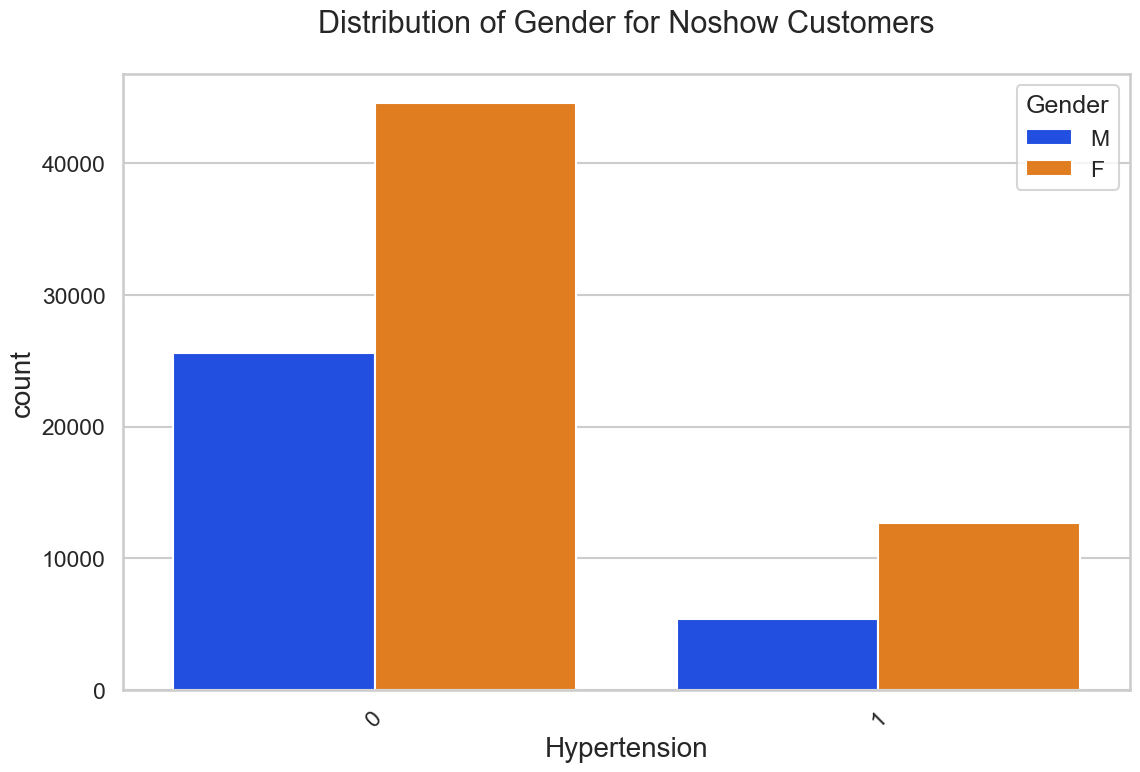

In [53]:
uniplot(df1, col="Hypertension", title="Distribution of Gender for Noshow Customers", hue="Gender")

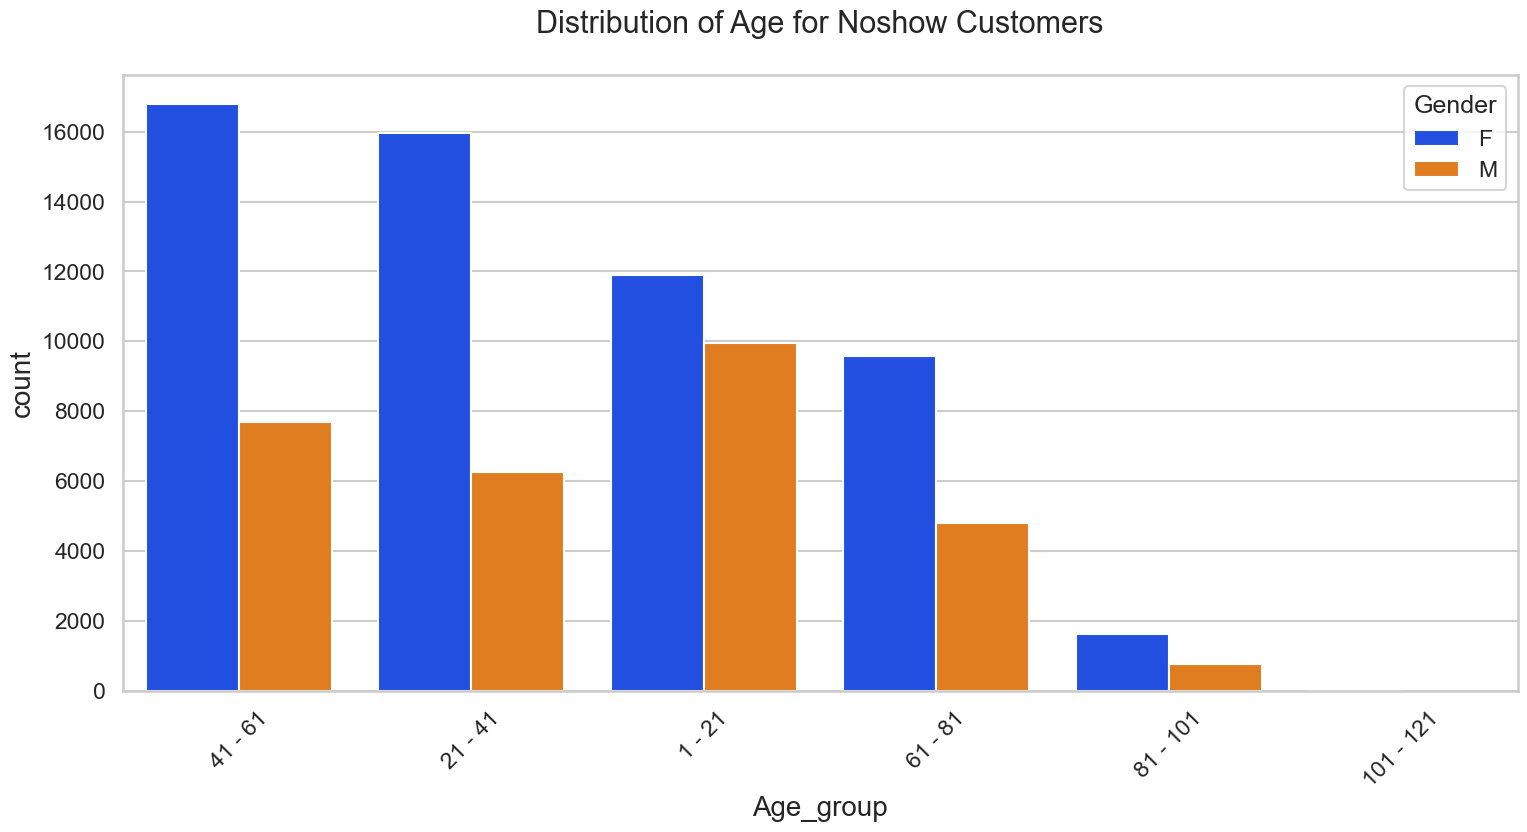

In [54]:
uniplot(df1, col="Age_group", title="Distribution of Age for Noshow Customers", hue="Gender")


Final conclusion or Insights we have found so far :

1)Female patients have taken more appointments then male patients

2)Ratio of Noshow and Show is almost equal for age group except Age 0 and Age 1 with 80% show rate for each age group

3)Each Neighbourhood have almost 80% show rate

4)There are 99666 patients without Scholarship and out of them around 80% have come for the visit and out of the 21801 patients with Scholarship around 75% of them have come for the visit.

5)There are around 88,726 patients without Hypertension and out of them around 78% have come for the visit and Out of the 21801 patients with Hypertension around 85% of them have come for the visit.

6)There are around 102,584 patients without Diabetes and out of them around 80% have come for the visit and Out of the 7,943 patients with Diabetes around 83% of them have come for the visit.

7)There are around 75,045 patients who have not received SMS and out of them around 84% have come for the visit and out of the 35,482 patients who have received SMS around 72% of them have come for the visit.

8)There is no appointments on sunday and on saturday appointments are very less in comparision to other week days